図13.2のプロット

In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 
from scipy import signal

In [2]:
#2次遅れ系のパラメータを与える
K = 1.0
omega = 10
zeta = 0.5

#積分制御のパラメータを与える
Ki1 = 1 #K_i=1の場合の積分制御のゲイン
Ki2 = 3 #K_i=3の場合の積分制御のゲイン
Ki3 = 9 #K_i=9の場合の積分制御のゲイン

#2次遅れ系の分子・分母多項式と伝達関数表現
num = [0, 0, K * omega**2] #2次遅れ系の分子多項式
den = [1, 2 * zeta * omega, omega**2] #2次遅れ系の分母多項式
sys = matlab.tf(num, den) #2次遅れ系の伝達関数表現    

#積分制御の分子・分母多項式と伝達関数表現
numc1 = [0, Ki1] #K_i = 1の場合の分子多項式
numc2 = [0, Ki2] #K_i = 3の場合の分子多項式
numc3 = [0, Ki3] #K_i = 9の場合の分子多項式
denc = [1,0] #積分制御の分母多項式

c1 = matlab.tf(numc1, denc) #K_i = 1の場合のコントローラの伝達関数表現  
c2 = matlab.tf(numc2, denc) #K_i = 3の場合のコントローラの伝達関数表現   
c3 = matlab.tf(numc3, denc) #K_i = 9の場合のコントローラの伝達関数表現 

#開ループ伝達関数L(s)を求める
sysL1 = c1*sys #K_i=1の場合の伝達関数
sysL2 = c2*sys #K_i=3の場合の伝達関数
sysL3 = c3*sys #K_i=9の場合の伝達関数

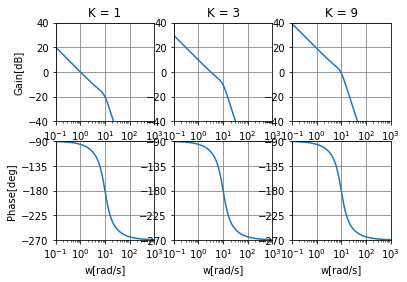

In [3]:
#図13.3のプロット

#開ループ伝達関数L_{1}(s)の分子・分母多項式を抜き出す
[numL11, denL11] = matlab.tfdata(sysL1) #開ループ伝達関数の分子・分母多項式を抜き出す
numL1 = numL11[0][0] #分子多項式におけるPythonの配列の処理
denL1 = denL11[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数L_{2}(s)の分子・分母多項式を抜き出す
[numL22, denL22] = matlab.tfdata(sysL2) #開ループ伝達関数の分子・分母多項式を抜き出す
numL2 = numL22[0] #分子多項式におけるPythonの配列の処理
denL2 = denL22[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数L_{2}(s)の分子・分母多項式を抜き出す
[numL33, denL33] = matlab.tfdata(sysL3) #開ループ伝達関数の分子・分母多項式を抜き出す
numL3 = numL33[0][0] #分子多項式におけるPythonの配列の処理
denL3 = denL33[0][0] #分母多項式におけるPythonの配列の処理

#開ループ伝達関数の伝達関数表現を求める
LG1 = signal.lti(numL1, denL1) #L_1の場合の開ループ伝達関数（signal.ltiの場合）
LG2 = signal.lti(numL2, denL2) #L_2の場合の開ループ伝達関数（signal.ltiの場合）
LG3 = signal.lti(numL3, denL3) #L_3の場合の開ループ伝達関数（signal.ltiの場合）

#角周波数の範囲を指定
w = np.logspace(-1, 3, 1000) #対数的に等間隔なベクトルの生成(10^{-1}から10^{3}で1000点)

#図13.3のプロット

#図13.3(a)

# ゲインと位相の計算
wL1, gainL1, phaseL1 = signal.bode(LG1, w) #ゲインと位相

# 図13.3(a)のプロット
plt.subplot(2, 3, 1) #複数の図を並べるためのコマンド．2行1列の1行1列目という意味
plt.semilogx(wL1, gainL1) #ゲイン線図をプロット
plt.xlim([0.1,1000])#横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K = 1") #タイトルの表示

plt.subplot(2, 3, 4) #複数の図を並べるためのコマンド．2行1列の2行1列目という意味
plt.semilogx(wL1, phaseL1) #位相線図をプロット
plt.xlim([0.1,1000]) #横軸の範囲の指定
plt.ylim([-270,-90]) #縦軸の範囲の指定
plt.yticks([-270,-225,-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
plt.ylabel("Phase[deg]") #縦軸の表示

#図13.3(b)

#ゲインと位相の計算
wL2, gainL2, phaseL2 = signal.bode(LG2, w) #ゲインと位相

#図13.3(b)のプロット
plt.subplot(2, 3, 2) #複数の図を並べるためのコマンド．2行1列の1行2列目という意味
plt.semilogx(wL2, gainL2) #ゲイン線図をプロット
plt.xlim([0.1,1000])#横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K = 3") #タイトルの表示

plt.subplot(2, 3, 5) #複数の図を並べるためのコマンド．2行1列の2行2列目という意味
plt.semilogx(wL2, phaseL2) #位相線図をプロット
plt.xlim([0.1,1000]) #横軸の範囲の指定
plt.ylim([-270,-90]) #縦軸の範囲の指定
plt.yticks([-270,-225,-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
#plt.ylabel("Phase[deg]") #縦軸の表示

#図13.2(c)

#ゲインと位相の計算
wL3, gainL3, phaseL3 = signal.bode(LG3, w) #ゲインと位相

#図13.2(c)のプロット
plt.subplot(2, 3, 3) #複数の図を並べるためのコマンド．2行1列の1行3列目という意味
plt.semilogx(wL3, gainL3) #ゲイン線図をプロット
plt.xlim([0.1,1000])#横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
#plt.xlabel("w[rad/s]") #横軸のラベル表示
#plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.title("K = 9") #タイトルの表示

plt.subplot(2, 3, 6) #複数の図を並べるためのコマンド．2行1列の2行2列目という意味
plt.semilogx(wL3, phaseL3) #位相線図をプロット
plt.xlim([0.1,1000]) #横軸の範囲の指定
plt.ylim([-270,-90]) #縦軸の範囲の指定
plt.yticks([-270,-225,-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
#plt.ylabel("Phase[deg]") #縦軸の表示

plt.show() #グラフの表示

図13．3を同一グラフにプロット

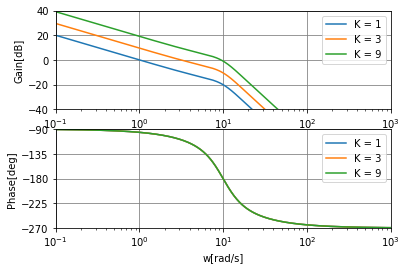

In [4]:
# ゲイン線図のプロット
plt.subplot(2, 1, 1) #2つの図を並べるためのコマンド．2行1列の1行目という意味
plt.semilogx(wL1, gainL1, label="K = 1") #ゲイン線図をプロット
plt.semilogx(wL2, gainL2, label="K = 3") #ゲイン線図をプロット
plt.semilogx(wL3, gainL3, label="K = 9") #ゲイン線図をプロット
plt.xlim([0.1,1000])#横軸（角周波数）の範囲の指定
plt.ylim([-40,40]) #縦軸の範囲の指定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸のラベル表示
plt.ylabel("Gain[dB]") #縦軸のラベル表示
plt.legend() #凡例の表示

# 位相線図のプロット
plt.subplot(2, 1, 2) #2つの図を並べるためのコマンド．2行1列の2行目という意味
plt.semilogx(wL1, phaseL1, label="K = 1") #位相線図をプロット
plt.semilogx(wL2, phaseL2, label="K = 3") #位相線図をプロット
plt.semilogx(wL3, phaseL3, label="K = 9") #位相線図をプロット
plt.xlim([0.1,1000]) #横軸の範囲の指定
plt.ylim([-270,-90]) #縦軸の範囲の指定
plt.yticks([-270,-225,-180,-135,-90]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("w[rad/s]") #横軸の表示
plt.ylabel("Phase[deg]") #縦軸の表示
plt.legend() #凡例の表示
plt.show() #グラフの表示